In [42]:
import pandas as pd

In [43]:
matches = pd.read_csv("../../preprocessing/data/matches.csv")
matches = matches.sort_values(by='Date')

### First we need to create necessary match statistics from present data

In [44]:
matches['w_2ndIn'] = matches['w_svpt'] - matches['w_1stIn']-matches['w_df']
matches['l_2ndIn'] = matches['l_svpt'] - matches['l_1stIn']-matches['l_df']

In [45]:
def calculate_1st_serve_in_percentage(row):
    if pd.isna(row['w_svpt']) or pd.isna(row['w_1stIn']):
        return None
    if row['w_svpt'] > 0:
        return row['w_1stIn'] / row['w_svpt']
    return 0

def calculate_1st_serve_win_percentage(row):
    if pd.isna(row['w_1stIn']) or pd.isna(row['w_1stWon']):
        return None
    if row['w_1stIn'] > 0:
        return row['w_1stWon'] / row['w_1stIn']
    return 0

def calculate_2nd_serve_in_percentage(row):
    if pd.isna(row['w_svpt']) or pd.isna(row['w_2ndIn']):
        return None
    if row['w_svpt'] > 0:
        return row['w_2ndIn'] / row['w_svpt']
    return 0

def calculate_2nd_serve_win_percentage(row):
    if pd.isna(row['w_2ndIn']) or pd.isna(row['w_1stIn']) or pd.isna(row['w_2ndWon']):
        return None
    if row['w_2ndIn'] - row['w_1stIn'] > 0:
        return row['w_2ndWon'] / (row['w_2ndIn'] - row['w_1stIn'])
    return 0

def calculate_service_games_won_percentage(row):
    if pd.isna(row['w_SvGms']) or pd.isna(row['w_bpFaced']) or pd.isna(row['w_bpSaved']):
        return None
    if row['w_SvGms'] > 0:
        return (row['w_SvGms'] - (row['w_bpFaced'] - row['w_bpSaved'])) / row['w_SvGms']
    return 0
    

def calculate_1st_serve_in_percentage_loser(row):
    if pd.isna(row['l_svpt']) or pd.isna(row['l_1stIn']):
        return None
    if row['l_svpt'] > 0:
        return row['l_1stIn'] / row['l_svpt']
    return 0

def calculate_1st_serve_win_percentage_loser(row):
    if pd.isna(row['l_1stIn']) or pd.isna(row['l_1stWon']):
        return None
    if row['l_1stIn'] > 0:
        return row['l_1stWon'] / row['l_1stIn']
    return 0

def calculate_2nd_serve_in_percentage_loser(row):
    if pd.isna(row['l_svpt']) or pd.isna(row['l_1stIn']) or pd.isna(row['l_2ndIn']):
        return None
    if row['l_svpt'] - row['l_1stIn'] > 0:
        return row['l_2ndIn'] / (row['l_svpt'] - row['l_1stIn'])
    return 0

def calculate_2nd_serve_win_percentage_loser(row):
    if pd.isna(row['l_2ndIn']) or pd.isna(row['l_2ndWon']):
        return None
    if row['l_2ndIn'] > 0:
        return row['l_2ndWon'] / row['l_2ndIn']
    return 0

def calculate_service_games_won_percentage_loser(row):
    if pd.isna(row['l_SvGms']) or pd.isna(row['l_bpFaced']) or pd.isna(row['l_bpSaved']):
        return None
    if row['l_SvGms'] > 0:
        return (row['l_SvGms'] - (row['l_bpFaced'] - row['l_bpSaved'])) / row['l_SvGms']
    return 0

In [46]:
matches['winner_1st_serve_in_pct'] = matches.apply(calculate_1st_serve_in_percentage, axis=1)
matches['winner_1st_serve_win_pct'] = matches.apply(calculate_1st_serve_win_percentage, axis=1)
matches['winner_2nd_serve_in_pct'] = matches.apply(calculate_2nd_serve_in_percentage, axis=1)
matches['winner_2nd_serve_win_pct'] = matches.apply(calculate_2nd_serve_win_percentage, axis=1)
matches['winner_service_games_won_pct'] = matches.apply(calculate_service_games_won_percentage, axis=1)
matches['loser_1st_serve_in_pct'] = matches.apply(calculate_1st_serve_in_percentage_loser, axis=1)
matches['loser_1st_serve_win_pct'] = matches.apply(calculate_1st_serve_win_percentage_loser, axis=1)
matches['loser_2nd_serve_in_pct'] = matches.apply(calculate_2nd_serve_in_percentage_loser, axis=1)
matches['loser_2nd_serve_win_pct'] = matches.apply(calculate_2nd_serve_win_percentage_loser, axis=1)
matches['loser_service_games_won_pct'] = matches.apply(calculate_service_games_won_percentage_loser, axis=1)

In [47]:
def calculate_1st_serve_return_win_percentage(row):
    if pd.isna(row['loser_1st_serve_win_pct']):
        return None
    return 1 - row['loser_1st_serve_win_pct']

def calculate_2nd_serve_return_win_percentage(row):
    if pd.isna(row['loser_2nd_serve_win_pct']):
        return None
    return 1 - row['loser_2nd_serve_win_pct']

def calculate_return_games_win_percentage(row):
    if pd.isna(row['loser_service_games_won_pct']):
        return None
    return 1 - row['loser_service_games_won_pct']

def calculate_1st_serve_return_win_percentage_loser(row):
    if pd.isna(row['winner_1st_serve_win_pct']):
        return None
    return 1 - row['winner_1st_serve_win_pct']

def calculate_2nd_serve_return_win_percentage_loser(row):
    if pd.isna(row['winner_2nd_serve_win_pct']):
        return None
    return 1 - row['winner_2nd_serve_win_pct']

def calculate_return_games_win_percentage_loser(row):
    if pd.isna(row['winner_service_games_won_pct']):
        return None
    return 1 - row['winner_service_games_won_pct']

In [48]:
matches['winner_1st_serve_return_win_pct'] = matches.apply(calculate_1st_serve_return_win_percentage, axis=1)
matches['winner_2nd_serve_return_win_pct'] = matches.apply(calculate_2nd_serve_return_win_percentage, axis=1)
matches['winner_return_games_win_pct'] = matches.apply(calculate_return_games_win_percentage, axis=1)
matches['loser_1st_serve_return_win_pct'] = matches.apply(calculate_1st_serve_return_win_percentage_loser, axis=1)
matches['loser_2nd_serve_return_win_pct'] = matches.apply(calculate_2nd_serve_return_win_percentage_loser, axis=1)
matches['loser_return_games_win_pct'] = matches.apply(calculate_return_games_win_percentage_loser, axis=1)

In [49]:
def calculate_percentage_of_break_points_won_on_opponents_serve(row):
    if pd.isna(row['l_bpFaced']) or pd.isna(row['l_bpSaved']):
        return None
    if row['l_bpFaced'] > 0:
        return (row['l_bpFaced'] - row['l_bpSaved']) / row['l_bpFaced']
    return 0

def calculate_percentage_of_break_points_won_on_opponents_serve_loser(row):
    if pd.isna(row['w_bpFaced']) or pd.isna(row['w_bpSaved']):
        return None
    if row['w_bpFaced'] > 0:
        return (row['w_bpFaced'] - row['w_bpSaved']) / row['w_bpFaced']
    return 0

def calculate_percentage_of_break_points_saved(row):
    if pd.isna(row['w_bpFaced']) or pd.isna(row['w_bpSaved']):
        return None
    if row['w_bpFaced'] > 0:
        return row['w_bpSaved'] / row['w_bpFaced']
    return 0

def calculate_percentage_of_break_points_saved_loser(row):
    if pd.isna(row['l_bpFaced']) or pd.isna(row['l_bpSaved']):
        return None
    if row['l_bpFaced'] > 0:
        return row['l_bpSaved'] / row['l_bpFaced']
    return 0

In [50]:
matches['winner_bp_won_pct'] = matches.apply(calculate_percentage_of_break_points_won_on_opponents_serve, axis=1)
matches['loser_bp_won_pct'] = matches.apply(calculate_percentage_of_break_points_won_on_opponents_serve_loser, axis=1)
matches['winner_bp_saved_pct'] = matches.apply(calculate_percentage_of_break_points_saved, axis=1)
matches['loser_bp_saved_pct'] = matches.apply(calculate_percentage_of_break_points_saved_loser, axis=1)

In [51]:
# Save for website usage
matches[['match_id', 'w_2ndIn', 'l_2ndIn',  'winner_1st_serve_in_pct',
 'winner_1st_serve_win_pct',
 'winner_2nd_serve_in_pct',
 'winner_2nd_serve_win_pct',
 'winner_service_games_won_pct',
 'loser_1st_serve_in_pct',
 'loser_1st_serve_win_pct',
 'loser_2nd_serve_in_pct',
 'loser_2nd_serve_win_pct',
 'loser_service_games_won_pct',
 'winner_1st_serve_return_win_pct',
 'winner_2nd_serve_return_win_pct',
 'winner_return_games_win_pct',
 'loser_1st_serve_return_win_pct',
 'loser_2nd_serve_return_win_pct',
 'loser_return_games_win_pct',
 'winner_bp_won_pct',
 'loser_bp_won_pct',
 'winner_bp_saved_pct',
 'loser_bp_saved_pct']].to_csv("../../creating_dataframes_for_webpage/data/match_stats.csv", index=False)

### Surface weighting

In [52]:
def calculate_surface_weights_kl(data, stat_cols, surface_col, bins=20, handle_nans='fill'):
    import numpy as np
    import pandas as pd
    from scipy.stats import entropy
    
    # Initialize weights dictionary
    weights_dict = {}
    surfaces = data[surface_col].unique()
    winner_cols = [col for col in stat_cols if col.startswith('w')]
    loser_cols = [col for col in stat_cols if col.startswith('l')]

    for winner_col, loser_col in zip(winner_cols, loser_cols):
        # Handle NaNs in both winner and loser columns
        if handle_nans == 'fill':  # Fill NaNs with column mean
            data[winner_col] = data[winner_col].fillna(data[winner_col].mean())
            data[loser_col] = data[loser_col].fillna(data[loser_col].mean())
        elif handle_nans == 'skip':  # Drop rows with NaNs
            data = data.dropna(subset=[winner_col, loser_col])

        # Initialize weights with float type
        weights = pd.DataFrame(0.0, index=surfaces, columns=surfaces)

        for s1 in surfaces:
            for s2 in surfaces:
                # Combine winner and loser stats for each surface
                p_data = np.concatenate([
                    data[data[surface_col] == s1][winner_col].values,
                    data[data[surface_col] == s1][loser_col].values
                ])
                q_data = np.concatenate([
                    data[data[surface_col] == s2][winner_col].values,
                    data[data[surface_col] == s2][loser_col].values
                ])

                # Create histograms with shared bins
                p_hist, bin_edges = np.histogram(p_data, bins=bins, density=True)
                q_hist, _ = np.histogram(q_data, bins=bin_edges, density=True)

                # Avoid zero probabilities
                p_hist = p_hist + 1e-9
                q_hist = q_hist + 1e-9

                # Normalize histograms
                p_hist /= p_hist.sum()
                q_hist /= q_hist.sum()

                # KL divergence and similarity weight
                kl_div = entropy(p_hist, q_hist)
                weights.loc[s1, s2] = 1 / (1 + kl_div)

        # Store weights for both winner and loser columns
        weights_dict[winner_col] = weights
        weights_dict[loser_col] = weights

    return weights_dict


In [53]:
weights_dict = calculate_surface_weights_kl(matches, ['w_ace', 'l_ace', 'w_df', 'l_df', 'w_2ndIn', 'l_2ndIn',  'winner_1st_serve_in_pct',
 'winner_1st_serve_win_pct',
 'winner_2nd_serve_in_pct',
 'winner_2nd_serve_win_pct',
 'winner_service_games_won_pct',
 'loser_1st_serve_in_pct',
 'loser_1st_serve_win_pct',
 'loser_2nd_serve_in_pct',
 'loser_2nd_serve_win_pct',
 'loser_service_games_won_pct',
 'winner_1st_serve_return_win_pct',
 'winner_2nd_serve_return_win_pct',
 'winner_return_games_win_pct',
 'loser_1st_serve_return_win_pct',
 'loser_2nd_serve_return_win_pct',
 'loser_return_games_win_pct',
 'winner_bp_won_pct',
 'loser_bp_won_pct',
 'winner_bp_saved_pct',
 'loser_bp_saved_pct'], 'Surface', bins=20)

In [54]:
weights_dict['w_ace']

,Hard,Clay,Grass
Hard,1.000000,0.833489,0.964563
Clay,0.851985,1.000000,0.734754
Grass,0.958417,0.703039,1.000000


In [55]:
from scipy.stats import f_oneway

# ANOVA Test for Surface Dependency
def anova_test_all_stats(data, stats_cols, surface_col):
    results = {}
    for stat_col in stats_cols:
        # Group data by surface
        groups = [data.loc[data[surface_col] == surface, stat_col] for surface in data[surface_col].unique()]
        
        # Perform ANOVA
        anova_p = f_oneway(*groups).pvalue
        results[stat_col] = anova_p
    
    # Sort results by p-value
    return pd.DataFrame.from_dict(results, orient='index', columns=['p_value']).sort_values(by='p_value')

In [56]:
anova_results = anova_test_all_stats(matches, ['w_ace', 'l_ace', 'w_df', 'l_df', 'w_2ndIn', 'l_2ndIn',  'winner_1st_serve_in_pct',
 'winner_1st_serve_win_pct',
 'winner_2nd_serve_in_pct',
 'winner_2nd_serve_win_pct',
 'winner_service_games_won_pct',
 'loser_1st_serve_in_pct',
 'loser_1st_serve_win_pct',
 'loser_2nd_serve_in_pct',
 'loser_2nd_serve_win_pct',
 'loser_service_games_won_pct',
 'winner_1st_serve_return_win_pct',
 'winner_2nd_serve_return_win_pct',
 'winner_return_games_win_pct',
 'loser_1st_serve_return_win_pct',
 'loser_2nd_serve_return_win_pct',
 'loser_return_games_win_pct',
 'winner_bp_won_pct',
 'loser_bp_won_pct',
 'winner_bp_saved_pct',
 'loser_bp_saved_pct'], 'Surface')

In [57]:
anova_results

,p_value
w_ace,3.735271e-283
l_ace,8.941915e-191
winner_1st_serve_win_pct,4.700843e-171
loser_1st_serve_return_win_pct,4.700843e-171
winner_1st_serve_return_win_pct,2.396935e-152
loser_1st_serve_win_pct,2.396935e-152
loser_service_games_won_pct,7.466520e-117
winner_return_games_win_pct,7.466520e-117
loser_return_games_win_pct,7.854912e-98
winner_service_games_won_pct,7.854912e-98


In [58]:
matches['Date'] = pd.to_datetime(matches['Date'], errors='coerce')

In [59]:
def number_of_common_opponent_matches(row, df):
    player_a = row['winner_id']
    player_b = row['loser_id']
    current_date = row['Date']
    
    # Filter for matches that occurred before the current match date
    df = df[df['Date'] < current_date]
    
    # Find common opponents
    player_a_opponents = set(df[(df['winner_id'] == player_a)]['loser_id']).union(
                         set(df[(df['loser_id'] == player_a)]['winner_id']))
    player_b_opponents = set(df[(df['winner_id'] == player_b)]['loser_id']).union(
                         set(df[(df['loser_id'] == player_b)]['winner_id']))

    common_opponents = player_a_opponents.intersection(player_b_opponents)
    return len(common_opponents)

In [60]:
matches[['num_CO_matches']] = matches.apply(
    lambda row: pd.Series(number_of_common_opponent_matches(row, matches)), axis=1
)

In [103]:
import numpy as np
import pandas as pd
from scipy.stats import entropy


# Weighted Mean
def calculate_weighted_mean(values, times, surface_weights, decay_rate=0.3):
    if len(values) == 0 or len(times) == 0:
        return 0.0
    time_weights = np.exp(-decay_rate * times)
    combined_weights = surface_weights * time_weights
    return np.sum(combined_weights * values) / np.sum(combined_weights)


# Weighted Variance
def calculate_uncertainty_from_weights(values, times, surface_weights, decay_rate=0.3):
    # Handle edge cases
    if len(values) == 0 or len(times) == 0:
        return 1.0  # Maximum uncertainty for no data

    # Calculate weights
    time_weights = np.exp(-decay_rate * times)  # Time decay weights
    combined_weights = surface_weights * time_weights  # Combined weights

    # Total weight used in aggregation
    total_weight = np.sum(combined_weights)

    # Uncertainty as inverse of total weight
    uncertainty = 1 / total_weight if total_weight > 0 else 1.0  # Avoid division by zero

    return uncertainty


# Calculate Stats with Uncertainty
def calculate_stats_with_uncertainty(row, df, weights_dict, winner_col, loser_col, surface_col, time_decay=0.3, is_co=False):
    player_a = row['winner_id']
    player_b = row['loser_id']
    current_date = row['Date']
    current_surface = row[surface_col]
    
    past_matches = df[df['Date'] < current_date].copy()
    # Filter matches based on CO
    if is_co:
        # Filter only matches against common opponents
        player_a_opponents = set(past_matches[past_matches['winner_id'] == player_a]['loser_id']).union(
            past_matches[past_matches['loser_id'] == player_a]['winner_id']
        )
        player_b_opponents = set(past_matches[past_matches['winner_id'] == player_b]['loser_id']).union(
            past_matches[past_matches['loser_id'] == player_b]['winner_id']
        )
        common_opponents = player_a_opponents.intersection(player_b_opponents)
        past_matches = past_matches[
            (
                (past_matches['winner_id'].isin(common_opponents)) | (past_matches['loser_id'].isin(common_opponents))
            )
        ]

    past_matches['time_since_match'] = (current_date - past_matches['Date']).dt.days / 365.0

    # Player A Stats
    player_a_matches = past_matches[
        (past_matches['winner_id'] == player_a) | (past_matches['loser_id'] == player_a)
    ]
    player_a_stats = player_a_matches[winner_col].combine_first(player_a_matches[loser_col]).fillna(0)
    player_a_times = player_a_matches['time_since_match']

    # Player B Stats
    player_b_matches = past_matches[
        (past_matches['winner_id'] == player_b) | (past_matches['loser_id'] == player_b)
    ]
    player_b_stats = player_b_matches[winner_col].combine_first(player_b_matches[loser_col]).fillna(0)
    player_b_times = player_b_matches['time_since_match']

    # Surface Weights
    player_a_surfaces = player_a_matches[surface_col].values
    player_a_surface_weights = np.array([
        weights_dict[winner_col].loc[current_surface, surface] for surface in player_a_surfaces
    ])
    player_b_surfaces = player_b_matches[surface_col].values
    player_b_surface_weights = np.array([
        weights_dict[winner_col].loc[current_surface, surface] for surface in player_b_surfaces
    ])
    
    # Weighted Means
    player_a_mean = calculate_weighted_mean(
        player_a_stats.values, player_a_times.values, player_a_surface_weights, time_decay
    )
    player_b_mean = calculate_weighted_mean(
        player_b_stats.values, player_b_times.values, player_b_surface_weights, time_decay
    )

    # Weighted Variance for Uncertainty
    player_a_uncertainty = calculate_uncertainty_from_weights(player_a_stats.values, player_a_times.values, player_a_surface_weights, time_decay)
    player_b_uncertainty = calculate_uncertainty_from_weights(player_b_stats.values, player_b_times.values, player_b_surface_weights, time_decay)

    return player_a_mean, player_b_mean, player_a_uncertainty, player_b_uncertainty


# Process Stats for Regular and CO Columns
def process_all_stats(df, weights_dict, stat_cols: [tuple], surface_col):
    results = {}
    for stat_tuple in stat_cols:
        winner_col = stat_tuple[0]
        loser_col = stat_tuple[1]

        # Regular Columns
        means_uncertainties = df.apply(
            lambda row: calculate_stats_with_uncertainty(
                row, df, weights_dict, winner_col, loser_col, surface_col, is_co=False
            ),
            axis=1,
        )
        winner_avg, loser_avg, winner_unc, loser_unc = zip(*means_uncertainties)

        # Store Regular Columns
        results[f"{winner_col}_avg"] = winner_avg
        results[f"{loser_col}_avg"] = loser_avg
        results[f"{winner_col}_uncertainty"] = winner_unc
        results[f"{loser_col}_uncertainty"] = loser_unc

        # CO Columns
        co_means_uncertainties = df.apply(
            lambda row: calculate_stats_with_uncertainty(
                row, df, weights_dict, winner_col, loser_col, surface_col, is_co=True
            ),
            axis=1,
        )
        co_winner_avg, co_loser_avg, co_winner_unc, co_loser_unc = zip(*co_means_uncertainties)

        # Store CO Columns
        if winner_col.startswith('w_'):
            results[f"{winner_col.replace('w', 'w_CO')}_avg"] = co_winner_avg
            results[f"{loser_col.replace('l', 'l_CO')}_avg"] = co_loser_avg
            results[f"{winner_col.replace('w', 'w_CO')}_uncertainty"] = co_winner_unc
            results[f"{loser_col.replace('l', 'l_CO')}_uncertainty"] = co_loser_unc
        if winner_col.startswith('winner'):
            results[f"{winner_col.replace('winner', 'winner_CO')}_avg"] = co_winner_avg
            results[f"{loser_col.replace('loser', 'loser_CO')}_avg"] = co_loser_avg
            results[f"{winner_col.replace('winner', 'winner_CO')}_uncertainty"] = co_winner_unc
            results[f"{loser_col.replace('loser', 'loser_CO')}_uncertainty"] = co_loser_unc

    # Add results to dataframe
    for col, values in results.items():
        df[col] = values

    return df


In [104]:
matches = process_all_stats(matches, weights_dict, [('w_ace', 'l_ace'), ('w_df', 'l_df'),
                                                    ('w_2ndIn', 'l_2ndIn'), ('winner_1st_serve_in_pct',  'loser_1st_serve_in_pct'),
('winner_1st_serve_win_pct', 'loser_1st_serve_win_pct'),
('winner_2nd_serve_in_pct',  'loser_2nd_serve_in_pct'),
('winner_2nd_serve_win_pct',  'loser_2nd_serve_win_pct'),
('winner_service_games_won_pct',  'loser_service_games_won_pct'),
('winner_1st_serve_return_win_pct',  'loser_1st_serve_return_win_pct'),
('winner_2nd_serve_return_win_pct',  'loser_2nd_serve_return_win_pct'),
('winner_return_games_win_pct', 'loser_return_games_win_pct'),
('winner_bp_won_pct', 'loser_bp_won_pct'),
('winner_bp_saved_pct', 'loser_bp_saved_pct')
                           ]
                           , 'Surface')
matches[['match_id', 'Date', 'winner_name', 'loser_name', 'w_df', 'w_df_avg', 'w_df_uncertainty', 'w_CO_df_avg', 'w_CO_df_uncertainty', 'w_CO_ace_uncertainty', 'winner_CO_1st_serve_in_pct_avg']]

,match_id,Date,winner_name,loser_name,w_df,w_df_avg,w_df_uncertainty,w_CO_df_avg,w_CO_df_uncertainty,w_CO_ace_uncertainty,winner_CO_1st_serve_in_pct_avg
0,Brisbane_2018_105238_106043,2017-12-31,Alexandr Dolgopolov,Diego Schwartzman,4.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
1,Brisbane_2018_200282_105449,2017-12-31,Alex De Minaur,Steve Johnson,3.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
30,Doha_2018_105932_105341,2018-01-01,Nikoloz Basilashvili,Thomas Fabbiano,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
29,Doha_2018_106233_105539,2018-01-01,Dominic Thiem,Evgeny Donskoy,3.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
28,Doha_2018_104269_104534,2018-01-01,Fernando Verdasco,Dudi Sela,6.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
14081,Metz_2023_207686_105732,2023-11-10,Alexander Shevchenko,Pierre Hugues Herbert,0.0,2.565411,0.032744,2.864971,0.085381,0.090418,0.587021
14108,Sofia_2023_207733_105526,2023-11-10,Jack Draper,Jan Lennard Struff,2.0,2.386129,0.022065,2.482986,0.034825,0.035402,0.606363
14109,Sofia_2023_105173_200303,2023-11-10,Adrian Mannarino,Pavel Kotov,0.0,2.285314,0.007150,2.172509,0.034486,0.034948,0.636042
14083,Metz_2023_200005_207686,2023-11-11,Ugo Humbert,Alexander Shevchenko,0.0,2.640218,0.009697,2.893917,0.043750,0.045578,0.621891


In [105]:
matches = matches.copy()

In [108]:
def calculate_combined_uncertainties(df, stat_cols: [tuple]):
    non_co_uncertainty_cols_winner = []
    non_co_uncertainty_cols_loser = []
    co_uncertainty_cols_winner = []
    co_uncertainty_cols_loser = []
    for stat_tuple in stat_cols:
        winner_col = stat_tuple[0]
        loser_col = stat_tuple[1]
    
        non_co_uncertainty_cols_winner.append(f"{winner_col}_uncertainty")
        non_co_uncertainty_cols_loser.append(f"{loser_col}_uncertainty")
        
        if winner_col.startswith('w_'):
            co_uncertainty_cols_winner.append(f"{winner_col.replace('w', 'w_CO')}_uncertainty")
            co_uncertainty_cols_loser.append(f"{loser_col.replace('l', 'l_CO')}_uncertainty")
        if winner_col.startswith('winner'):
            co_uncertainty_cols_winner.append(f"{winner_col.replace('winner', 'winner_CO')}_uncertainty")
            co_uncertainty_cols_loser.append(f"{loser_col.replace('loser', 'loser_CO')}_uncertainty")
        

    # Compute the average uncertainty across all stats for each match (row)
    df['non_CO_uncertainty_winner'] = df[non_co_uncertainty_cols_winner].mean(axis=1)
    df['CO_uncertainty_winner'] = df[co_uncertainty_cols_winner].mean(axis=1)
    df['non_CO_uncertainty_loser'] = df[non_co_uncertainty_cols_loser].mean(axis=1)
    df['CO_uncertainty_loser'] = df[co_uncertainty_cols_loser].mean(axis=1)
    return df

In [109]:
matches = calculate_combined_uncertainties(matches, [('w_ace', 'l_ace'), ('w_df', 'l_df'),
                                                    ('w_2ndIn', 'l_2ndIn'), ('winner_1st_serve_in_pct',  'loser_1st_serve_in_pct'),
('winner_1st_serve_win_pct', 'loser_1st_serve_win_pct'),
('winner_2nd_serve_in_pct',  'loser_2nd_serve_in_pct'),
('winner_2nd_serve_win_pct',  'loser_2nd_serve_win_pct'),
('winner_service_games_won_pct',  'loser_service_games_won_pct'),
('winner_1st_serve_return_win_pct',  'loser_1st_serve_return_win_pct'),
('winner_2nd_serve_return_win_pct',  'loser_2nd_serve_return_win_pct'),
('winner_return_games_win_pct', 'loser_return_games_win_pct'),
('winner_bp_won_pct', 'loser_bp_won_pct'),
('winner_bp_saved_pct', 'loser_bp_saved_pct')
                           ])
matches[['match_id', 'Date', 'winner_name', 'loser_name', 'non_CO_uncertainty_winner', 'CO_uncertainty_winner', 'non_CO_uncertainty_loser', 'CO_uncertainty_loser']]

,match_id,Date,winner_name,loser_name,non_CO_uncertainty_winner,CO_uncertainty_winner,non_CO_uncertainty_loser,CO_uncertainty_loser
0,Brisbane_2018_105238_106043,2017-12-31,Alexandr Dolgopolov,Diego Schwartzman,1.000000,1.000000,1.000000,1.000000
1,Brisbane_2018_200282_105449,2017-12-31,Alex De Minaur,Steve Johnson,1.000000,1.000000,1.000000,1.000000
30,Doha_2018_105932_105341,2018-01-01,Nikoloz Basilashvili,Thomas Fabbiano,1.000000,1.000000,1.000000,1.000000
29,Doha_2018_106233_105539,2018-01-01,Dominic Thiem,Evgeny Donskoy,1.000000,1.000000,1.000000,1.000000
28,Doha_2018_104269_104534,2018-01-01,Fernando Verdasco,Dudi Sela,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
14081,Metz_2023_207686_105732,2023-11-10,Alexander Shevchenko,Pierre Hugues Herbert,0.033036,0.086087,0.023150,0.121406
14108,Sofia_2023_207733_105526,2023-11-10,Jack Draper,Jan Lennard Struff,0.022112,0.034877,0.010300,0.030775
14109,Sofia_2023_105173_200303,2023-11-10,Adrian Mannarino,Pavel Kotov,0.007155,0.034503,0.031965,0.055666
14083,Metz_2023_200005_207686,2023-11-11,Ugo Humbert,Alexander Shevchenko,0.009720,0.043963,0.032006,0.058790


In [122]:
matches["CO_uncertainty_winner"] = matches["CO_uncertainty_winner"].clip(lower=0, upper=1)
matches["CO_uncertainty_loser"] = matches["CO_uncertainty_loser"].clip(lower=0, upper=1)
matches["non_CO_uncertainty_winner"] = matches["non_CO_uncertainty_winner"].clip(lower=0, upper=1)
matches["CO_uncertainty_loser"] = matches["CO_uncertainty_loser"].clip(lower=0, upper=1)


In [123]:
matches["CO_uncertainty"] = np.sqrt(matches["CO_uncertainty_winner"] * matches["CO_uncertainty_loser"])
matches["non_CO_uncertainty"] = np.sqrt(matches["non_CO_uncertainty_winner"] * matches["non_CO_uncertainty_loser"])

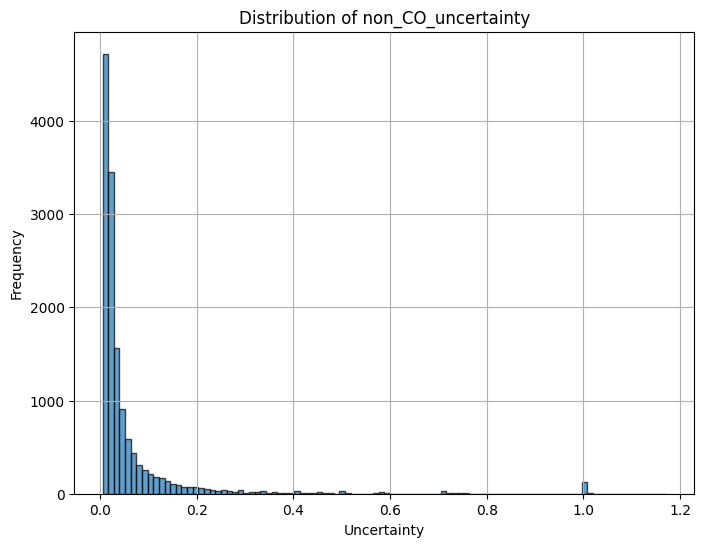

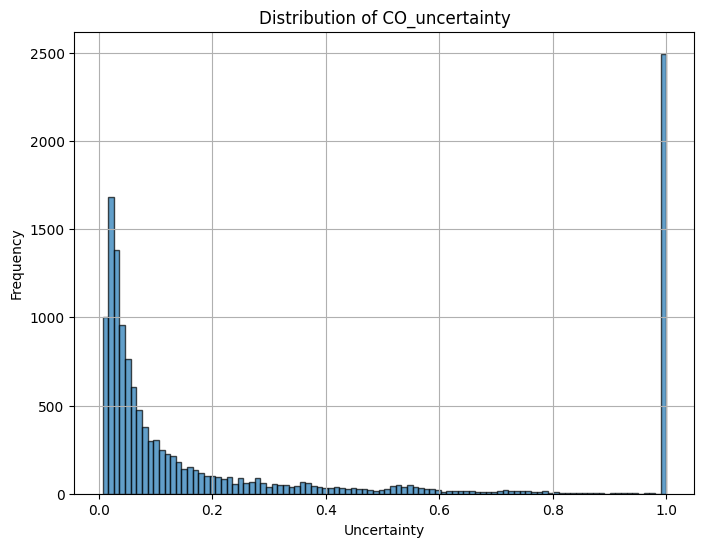

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(matches['non_CO_uncertainty'], bins=100, alpha=0.7, edgecolor='black')
plt.title(f'Distribution of non_CO_uncertainty')
plt.xlabel('Uncertainty')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(matches['CO_uncertainty'], bins=100, alpha=0.7, edgecolor='black')
plt.title(f'Distribution of CO_uncertainty')
plt.xlabel('Uncertainty')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [129]:
new_columns = matches[[ 'match_id',
    # w_ace and l_ace
    'w_ace_avg', 'l_ace_avg',
    'w_CO_ace_avg', 'l_CO_ace_avg',

    # w_df and l_df
    'w_df_avg', 'l_df_avg',
    'w_CO_df_avg', 'l_CO_df_avg',

    # w_2ndIn and l_2ndIn
    'w_2ndIn_avg', 'l_2ndIn_avg',
    'w_CO_2ndIn_avg', 'l_CO_2ndIn_avg',

    # 1st Serve In %
    'winner_1st_serve_in_pct_avg', 'loser_1st_serve_in_pct_avg',
    'winner_CO_1st_serve_in_pct_avg', 'loser_CO_1st_serve_in_pct_avg',

    # 1st Serve Win %
    'winner_1st_serve_win_pct_avg', 'loser_1st_serve_win_pct_avg',
    'winner_CO_1st_serve_win_pct_avg', 'loser_CO_1st_serve_win_pct_avg',

    # 2nd Serve In %
    'winner_2nd_serve_in_pct_avg', 'loser_2nd_serve_in_pct_avg',
    'winner_CO_2nd_serve_in_pct_avg', 'loser_CO_2nd_serve_in_pct_avg',

    # 2nd Serve Win %
    'winner_2nd_serve_win_pct_avg', 'loser_2nd_serve_win_pct_avg',
    'winner_CO_2nd_serve_win_pct_avg', 'loser_CO_2nd_serve_win_pct_avg',

    # Service Games Won %
    'winner_service_games_won_pct_avg', 'loser_service_games_won_pct_avg',
    'winner_CO_service_games_won_pct_avg', 'loser_CO_service_games_won_pct_avg',

    # 1st Serve Return Win %
    'winner_1st_serve_return_win_pct_avg', 'loser_1st_serve_return_win_pct_avg',
    'winner_CO_1st_serve_return_win_pct_avg', 'loser_CO_1st_serve_return_win_pct_avg',

    # 2nd Serve Return Win %
    'winner_2nd_serve_return_win_pct_avg', 'loser_2nd_serve_return_win_pct_avg',
    'winner_CO_2nd_serve_return_win_pct_avg', 'loser_CO_2nd_serve_return_win_pct_avg',

    # Return Games Win %
    'winner_return_games_win_pct_avg', 'loser_return_games_win_pct_avg',
    'winner_CO_return_games_win_pct_avg', 'loser_CO_return_games_win_pct_avg',

    # BP Won %
    'winner_bp_won_pct_avg', 'loser_bp_won_pct_avg',
    'winner_CO_bp_won_pct_avg', 'loser_CO_bp_won_pct_avg',

    # BP Saved %
    'winner_bp_saved_pct_avg', 'loser_bp_saved_pct_avg',
    'winner_CO_bp_saved_pct_avg', 'loser_CO_bp_saved_pct_avg',
    
    # Uncertainty
    'non_CO_uncertainty', 'CO_uncertainty'
]]

In [130]:
# Check for missing values in new columns
missing_values = new_columns.isnull().sum()

columns_with_nan = missing_values[missing_values > 0]

print("Columns with NaN values and their counts:")
print(columns_with_nan)

Columns with NaN values and their counts:
Series([], dtype: int64)


In [131]:
new_columns.to_csv("../data/aggregate_player_match_stats.csv", index=False)

In [21]:
# Select columns excluding 'match_id'
stat_cols = [col for col in new_columns.columns if col != 'match_id']

# Initialize dictionary for differences and list for column names
diff_columns = {}
diff_column_names = []

# Compute differences for each pair of winner and loser columns
for col in stat_cols:
    if 'winner_' in col and col.replace('winner_', 'loser_') in stat_cols:
        # Calculate difference between winner and loser columns
        loser_col = col.replace('winner_', 'loser_')
        diff_name = col.replace('winner_', '') + '_diff'  # Name for the difference column
        
        # Store difference and add to list
        diff_columns[diff_name] = new_columns[col] - new_columns[loser_col]
        diff_column_names.append(diff_name)  # Add new column name

# Create new DataFrame with match_id and computed differences
diff_df = new_columns[['match_id']].copy()  # Keep match_id
for diff_name, diff_values in diff_columns.items():
    diff_df[diff_name] = diff_values


# Print list of new column names
print("New column names for differences:")
print(diff_column_names)


New column names for differences:
['CO_1st_serve_in_pct_avg_diff', '1st_serve_in_pct_avg_diff', 'CO_1st_serve_win_pct_avg_diff', '1st_serve_win_pct_avg_diff', 'CO_2nd_serve_win_pct_avg_diff', '2nd_serve_win_pct_avg_diff', 'CO_serve_games_win_pct_avg_diff', 'serve_games_win_pct_avg_diff', 'CO_ace_avg_diff', 'ace_avg_diff', 'CO_df_avg_diff', 'df_avg_diff', 'CO_1st_serve_return_win_pct_avg_diff', '1st_serve_return_win_pct_avg_diff']


In [26]:
# new_columns = matches[['match_id', 'num_CO_matches', 'CO_1st_serve_in_pct_avg_diff', '1st_serve_in_pct_avg_diff', 'CO_1st_serve_win_pct_avg_diff', '1st_serve_win_pct_avg_diff', 'CO_2nd_serve_win_pct_avg_diff', '2nd_serve_win_pct_avg_diff', 'CO_serve_games_win_pct_avg_diff', 'serve_games_win_pct_avg_diff', 'CO_ace_avg_diff', 'ace_avg_diff', 'CO_df_avg_diff', 'df_avg_diff', 'CO_1st_serve_return_win_pct_avg_diff', '1st_serve_return_win_pct_avg_diff']]

KeyError: "['CO_1st_serve_in_pct_avg_diff', '1st_serve_in_pct_avg_diff', 'CO_1st_serve_win_pct_avg_diff', '1st_serve_win_pct_avg_diff', 'CO_2nd_serve_win_pct_avg_diff', '2nd_serve_win_pct_avg_diff', 'CO_serve_games_win_pct_avg_diff', 'serve_games_win_pct_avg_diff', 'CO_ace_avg_diff', 'ace_avg_diff', 'CO_df_avg_diff', 'df_avg_diff', 'CO_1st_serve_return_win_pct_avg_diff', '1st_serve_return_win_pct_avg_diff'] not in index"

In [27]:
diff_df.to_csv("../data/aggregate_player_match_stats_diff.csv", index=False)